# Programming Analytics Final Project

Loading the files

In [53]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
vaers_symptoms = pd.read_csv('2021VAERSSYMPTOMS.csv')

In [3]:
vaers_symptoms

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56528,1135949,Wheezing,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56529,1136535,Asthenia,24.0,Myalgia,24.0,Pyrexia,24.0,NaN,NaN,NaN,NaN
56530,1136622,Cardiac arrest,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56531,1136908,Chills,24.0,Gait disturbance,24.0,Headache,24.0,Monoplegia,24.0,Pyrexia,24.0


In [4]:
vaers_vax = pd.read_csv('2021VAERSVAX.csv')

In [5]:
vaers_vax

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...
40932,1135429,COVID19,JANSSEN,NaN,UNK,IM,LA,COVID19 (COVID19 (JANSSEN))
40933,1135949,COVID19,JANSSEN,1805020,1,SYR,LA,COVID19 (COVID19 (JANSSEN))
40934,1136535,COVID19,JANSSEN,NaN,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN))
40935,1136622,COVID19,JANSSEN,1808609,1,IM,NaN,COVID19 (COVID19 (JANSSEN))


In [6]:
vaers_data = pd.read_csv('2021VAERSData.csv', engine = 'python')

In [7]:
vaers_data

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40343,1135429,03/25/2021,IN,81.0,81.0,NaN,F,NaN,tongue and lip swelling concerning for anaphyl...,NaN,...,none,"dementia, HTN, Sick sinus syndrome with pacer,",NaN,NaN,2,03/25/2021,NaN,NaN,Y,sulfa antibiotics
40344,1135949,03/25/2021,WA,47.0,47.0,NaN,F,NaN,"Hives, wheezing, itching,rash chest tightness ...",NaN,...,"breast cancer, heart issue",NaN,NaN,NaN,2,03/25/2021,NaN,NaN,NaN,"kadcyla, ciprofloxacin, codeine, vancoycin"
40345,1136535,03/26/2021,MA,72.0,72.0,NaN,F,NaN,Patient reported fevers as high as 105 at reha...,NaN,...,CML,CML,NaN,NaN,2,03/26/2021,NaN,NaN,NaN,"Atorvastatin, Benazopril, Contrast, Isosorbide..."
40346,1136622,03/26/2021,NY,70.0,70.0,NaN,M,NaN,Patient had cardiac arrest secondary to MI les...,NaN,...,ESRD on HD. Recent Covid,"H/O of HTN, DM2 on insulin, CAD, HF mrEF, brad...",NaN,NaN,2,03/26/2021,NaN,NaN,NaN,NKDA


In [9]:
a = vaers_symptoms.merge(vaers_vax, on = 'VAERS_ID', how = 'left')
a

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57558,1135949,Wheezing,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,JANSSEN,1805020,1,SYR,LA,COVID19 (COVID19 (JANSSEN))
57559,1136535,Asthenia,24.0,Myalgia,24.0,Pyrexia,24.0,NaN,NaN,NaN,NaN,COVID19,JANSSEN,NaN,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN))
57560,1136622,Cardiac arrest,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,JANSSEN,1808609,1,IM,NaN,COVID19 (COVID19 (JANSSEN))
57561,1136908,Chills,24.0,Gait disturbance,24.0,Headache,24.0,Monoplegia,24.0,Pyrexia,24.0,COVID19,JANSSEN,NaN,1,SYR,RA,COVID19 (COVID19 (JANSSEN))


In [10]:
whole_data = a.merge(vaers_data, on='VAERS_ID', how='left')

In [11]:
whole_data

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57558,1135949,Wheezing,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"breast cancer, heart issue",NaN,NaN,NaN,2,03/25/2021,NaN,NaN,NaN,"kadcyla, ciprofloxacin, codeine, vancoycin"
57559,1136535,Asthenia,24.0,Myalgia,24.0,Pyrexia,24.0,NaN,NaN,NaN,...,CML,CML,NaN,NaN,2,03/26/2021,NaN,NaN,NaN,"Atorvastatin, Benazopril, Contrast, Isosorbide..."
57560,1136622,Cardiac arrest,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ESRD on HD. Recent Covid,"H/O of HTN, DM2 on insulin, CAD, HF mrEF, brad...",NaN,NaN,2,03/26/2021,NaN,NaN,NaN,NKDA
57561,1136908,Chills,24.0,Gait disturbance,24.0,Headache,24.0,Monoplegia,24.0,Pyrexia,...,Shingles with Postherpetic neuralgia Fibromyalgia,Fibromyalgia Long-term covid symptoms,NaN,NaN,2,03/26/2021,NaN,Y,NaN,ciprofloxacin walnuts dairy


In [12]:
whole_data.shape

(57563, 52)

In [13]:
vaers_symptoms_vax = vaers_symptoms.merge(vaers_vax, on='VAERS_ID', how='left')
whole_dataset = vaers_symptoms_vax.merge(vaers_data, on='VAERS_ID', how='left')

In [56]:
relevant_data = whole_dataset.filter(['VAX_NAME', 'VAX_DATE', 'ONSET_DATE'])
relevant_data

,VAX_NAME,VAX_DATE,ONSET_DATE
0,COVID19 (COVID19 (MODERNA)),12/28/2020,12/30/2020
1,COVID19 (COVID19 (MODERNA)),12/31/2020,12/31/2020
2,COVID19 (COVID19 (PFIZER-BIONTECH)),12/31/2020,12/31/2020
3,COVID19 (COVID19 (MODERNA)),12/23/2020,12/23/2020
4,COVID19 (COVID19 (MODERNA)),12/22/2020,12/29/2020
...,...,...,...
57558,COVID19 (COVID19 (JANSSEN)),03/23/2021,03/23/2021
57559,COVID19 (COVID19 (JANSSEN)),03/19/2021,03/20/2021
57560,COVID19 (COVID19 (JANSSEN)),03/24/2021,03/25/2021
57561,COVID19 (COVID19 (JANSSEN)),03/23/2021,03/24/2021


In [121]:
relevant_data['ONSET_DATE'] = pd.to_datetime(relevant_data['ONSET_DATE'])

,VAX_NAME,VAX_DATE,ONSET_DATE
0,COVID19 (COVID19 (MODERNA)),12/28/2020,2020-12-30
1,COVID19 (COVID19 (MODERNA)),12/31/2020,2020-12-31
2,COVID19 (COVID19 (PFIZER-BIONTECH)),12/31/2020,2020-12-31
3,COVID19 (COVID19 (MODERNA)),12/23/2020,2020-12-23
4,COVID19 (COVID19 (MODERNA)),12/22/2020,2020-12-29
...,...,...,...
57558,COVID19 (COVID19 (JANSSEN)),03/23/2021,2021-03-23
57559,COVID19 (COVID19 (JANSSEN)),03/19/2021,2021-03-20
57560,COVID19 (COVID19 (JANSSEN)),03/24/2021,2021-03-25
57561,COVID19 (COVID19 (JANSSEN)),03/23/2021,2021-03-24


In [122]:
relevant_data['VAX_DATE'] = pd.to_datetime(relevant_data['VAX_DATE'])

In [124]:
relevant_data['Days'] = (relevant_data['ONSET_DATE'] - relevant_data['VAX_DATE'])
relevant_data

,VAX_NAME,VAX_DATE,ONSET_DATE,Days
0,COVID19 (COVID19 (MODERNA)),2020-12-28,2020-12-30,2 days
1,COVID19 (COVID19 (MODERNA)),2020-12-31,2020-12-31,0 days
2,COVID19 (COVID19 (PFIZER-BIONTECH)),2020-12-31,2020-12-31,0 days
3,COVID19 (COVID19 (MODERNA)),2020-12-23,2020-12-23,0 days
4,COVID19 (COVID19 (MODERNA)),2020-12-22,2020-12-29,7 days
...,...,...,...,...
57558,COVID19 (COVID19 (JANSSEN)),2021-03-23,2021-03-23,0 days
57559,COVID19 (COVID19 (JANSSEN)),2021-03-19,2021-03-20,1 days
57560,COVID19 (COVID19 (JANSSEN)),2021-03-24,2021-03-25,1 days
57561,COVID19 (COVID19 (JANSSEN)),2021-03-23,2021-03-24,1 days


In [20]:
moderna = relevant_data.loc[relevant_data['VAX_NAME'] == 'COVID19 (COVID19 (MODERNA))']
moderna_v1 = moderna[moderna.Days.notnull()]
moderna_v1

,VAX_NAME,VAX_DATE,ONSET_DATE,Days
0,COVID19 (COVID19 (MODERNA)),2020-12-28,2020-12-30,2 days
1,COVID19 (COVID19 (MODERNA)),2020-12-31,2020-12-31,0 days
3,COVID19 (COVID19 (MODERNA)),2020-12-23,2020-12-23,0 days
4,COVID19 (COVID19 (MODERNA)),2020-12-22,2020-12-29,7 days
5,COVID19 (COVID19 (MODERNA)),2020-12-29,2020-12-29,0 days
...,...,...,...,...
57503,COVID19 (COVID19 (MODERNA)),2021-03-03,2021-03-03,0 days
57504,COVID19 (COVID19 (MODERNA)),2021-01-19,2021-01-21,2 days
57506,COVID19 (COVID19 (MODERNA)),2021-01-07,2021-02-21,45 days
57507,COVID19 (COVID19 (MODERNA)),2021-01-14,2021-02-08,25 days


In [77]:
int(str(moderna_v1['Days'][0]).split(' ')[0])

2

In [81]:
def time_to_int(t):
    return int(str(t).split(' ')[0])

In [84]:
moderna_v1['Days'] = moderna_v1['Days'].apply(time_to_int)

<ipython-input-84-e9a478929ca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderna_v1['Days'] = moderna_v1['Days'].apply(time_to_int)


In [95]:
moderna_v1['Days'] =  moderna_v1.loc[moderna_v1['Days']>=0, 'Days']

<ipython-input-95-e3fb0be46361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderna_v1['Days'] =  moderna_v1.loc[moderna_v1['Days']>=0, 'Days']


In [104]:
moderna_v1['Days'].sum()

505452.0

In [102]:
moderna_v1['Days'].sum()/moderna_v1['Days'].count()

19.908306747016425

In [88]:
def avg_onset(df):
    '''

    :param df: Dataframe
    :return: Mean of the days between vaccine and onset of symptoms
    '''
    mean = int(df["Days"].mean())
    return mean


In [115]:
moderna_onset = avg_onset(moderna_v1)
print(moderna_onset)
#pfizer_onset = avg_onset(pfizer_v1)
#print(pfizer_onset)
#janssen_onset = avg_onset(janssen_v1)
#print(janssen_onset)

19


In [93]:
vacc_date = '2020-1-1'
moderna_after_2020 = moderna_v1['VAX_DATE'] >= vacc_date
filtered_dates = moderna_v1.loc[moderna_after_2020]
filtered_dates['Days'] = filtered_dates.loc[filtered_dates['Days']>=0, 'Days']

<ipython-input-93-255ef468b7a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dates['Days'] = filtered_dates.loc[filtered_dates['Days']>=0, 'Days']


In [47]:
#filtered_dates["Days"] = filtered_dates["Days"].astype('timedelta64[D]')

<ipython-input-47-e0813b3a0920>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dates["Days"] = filtered_dates["Days"].astype('timedelta64[D]')


C:\Users\anish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


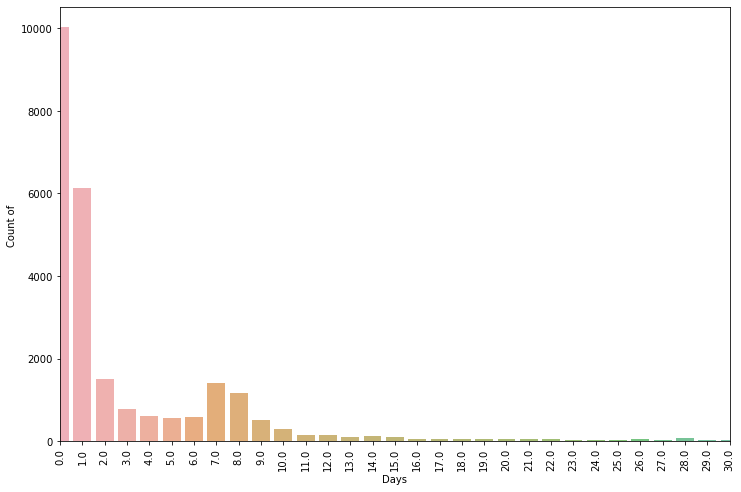

In [141]:
import seaborn as sns
Z = filtered_dates['Days'].value_counts()
plt.figure(figsize = (12,8))
sns.barplot(Z.index, Z.values, alpha = 0.75)
plt.xlim(0,30)
plt.ylabel('Count of ')
plt.xlabel('Days')
plt.xticks(rotation = 'vertical')
plt.show()

In [71]:
Z

0 days       10023
1 days        6123
2 days        1512
7 days        1418
8 days        1168
             ...  
-334 days        1
-25 days         1
-354 days        1
363 days         1
373 days         1
Name: Days, Length: 115, dtype: int64

In [127]:
pfizer = relevant_data.loc[relevant_data['VAX_NAME'] == 'COVID19 (COVID19 (PFIZER-BIONTECH))']
pfizer_v1 = pfizer[pfizer.Days.notnull()]
pfizer_v1

,VAX_NAME,VAX_DATE,ONSET_DATE,Days
2,COVID19 (COVID19 (PFIZER-BIONTECH)),2020-12-31,2020-12-31,0 days
18,COVID19 (COVID19 (PFIZER-BIONTECH)),2020-12-30,2020-12-30,0 days
20,COVID19 (COVID19 (PFIZER-BIONTECH)),2020-12-22,2020-12-25,3 days
26,COVID19 (COVID19 (PFIZER-BIONTECH)),2020-12-31,2020-12-31,0 days
28,COVID19 (COVID19 (PFIZER-BIONTECH)),2020-12-19,2020-12-19,0 days
...,...,...,...,...
57468,COVID19 (COVID19 (PFIZER-BIONTECH)),2021-02-28,2021-03-02,2 days
57505,COVID19 (COVID19 (PFIZER-BIONTECH)),2021-01-20,2021-01-26,6 days
57509,COVID19 (COVID19 (PFIZER-BIONTECH)),2021-01-16,2021-01-30,14 days
57540,COVID19 (COVID19 (PFIZER-BIONTECH)),2021-02-02,2021-02-07,5 days


In [128]:
pfizer_v1['Days'] = pfizer_v1['Days'].apply(time_to_int)

<ipython-input-128-944e48b1b971>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfizer_v1['Days'] = pfizer_v1['Days'].apply(time_to_int)


In [130]:
pfizer_v1['Days'] =  pfizer_v1.loc[pfizer_v1['Days']>=0, 'Days']

<ipython-input-130-f25c0d736e9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfizer_v1['Days'] =  pfizer_v1.loc[pfizer_v1['Days']>=0, 'Days']


In [131]:
pfizer_v1['Days'].sum()

408985.0

In [132]:
pfizer_v1['Days'].sum()/pfizer_v1['Days'].count()

17.25675105485232

In [133]:
pfizer_onset = avg_onset(pfizer_v1)
pfizer_onset

17

In [135]:
pfizer_after_2020 = pfizer_v1['VAX_DATE'] >= vacc_date
filtered_dates_p = pfizer_v1.loc[pfizer_after_2020]
filtered_dates_p['Days'] = filtered_dates_p.loc[filtered_dates_p['Days']>=0, 'Days']

<ipython-input-135-9d0ddd4e6c3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dates_p['Days'] = filtered_dates_p.loc[filtered_dates_p['Days']>=0, 'Days']


C:\Users\anish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


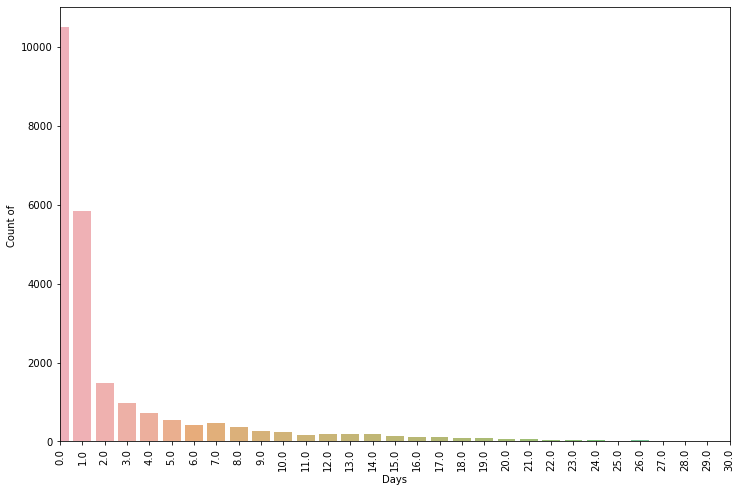

In [140]:
Y = filtered_dates_p['Days'].value_counts()
plt.figure(figsize = (12,8))
sns.barplot(Y.index, Y.values, alpha = 0.75)
plt.xlim(0,30)
plt.ylabel('Count of ')
plt.xlabel('Days')
plt.xticks(rotation = 'vertical')
plt.show()

In [139]:
#int(str(pfizer_v1['Days'][0]).split(' ')[0])

In [143]:
janssen = relevant_data.loc[relevant_data['VAX_NAME'] == 'COVID19 (COVID19 (JANSSEN))']
janssen_v1 = janssen[janssen.Days.notnull()]
janssen_v1

,VAX_NAME,VAX_DATE,ONSET_DATE,Days
47188,COVID19 (COVID19 (JANSSEN)),2021-03-01,2021-03-03,2 days
48012,COVID19 (COVID19 (JANSSEN)),2021-03-02,2021-03-02,0 days
48034,COVID19 (COVID19 (JANSSEN)),2021-03-03,2021-03-03,0 days
48035,COVID19 (COVID19 (JANSSEN)),2021-03-03,2021-03-03,0 days
48036,COVID19 (COVID19 (JANSSEN)),2021-03-03,2021-03-03,0 days
...,...,...,...,...
57558,COVID19 (COVID19 (JANSSEN)),2021-03-23,2021-03-23,0 days
57559,COVID19 (COVID19 (JANSSEN)),2021-03-19,2021-03-20,1 days
57560,COVID19 (COVID19 (JANSSEN)),2021-03-24,2021-03-25,1 days
57561,COVID19 (COVID19 (JANSSEN)),2021-03-23,2021-03-24,1 days


In [144]:
janssen_v1['Days'] = janssen_v1['Days'].apply(time_to_int)

<ipython-input-144-520eb2fb2e84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  janssen_v1['Days'] = janssen_v1['Days'].apply(time_to_int)


In [146]:
janssen_v1['Days'] =  janssen_v1.loc[janssen_v1['Days']>=0, 'Days']

<ipython-input-146-d1bdea97b4a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  janssen_v1['Days'] =  janssen_v1.loc[janssen_v1['Days']>=0, 'Days']


In [147]:
janssen_v1['Days'].sum()

42509.0

In [148]:
janssen_v1['Days'].sum()/janssen_v1['Days'].count()

11.15721784776903

In [149]:
janssen_onset = avg_onset(janssen_v1)
janssen_onset

11

In [150]:
janssen_after_2020 = janssen_v1['VAX_DATE'] >= vacc_date
filtered_dates_j = janssen_v1.loc[janssen_after_2020]
filtered_dates_j['Days'] = filtered_dates_j.loc[filtered_dates_j['Days']>=0, 'Days']

<ipython-input-150-fab230367294>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dates_j['Days'] = filtered_dates_j.loc[filtered_dates_j['Days']>=0, 'Days']


In [142]:
#plt.hist(filtered_dates["Days"], bins= 200)

C:\Users\anish\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


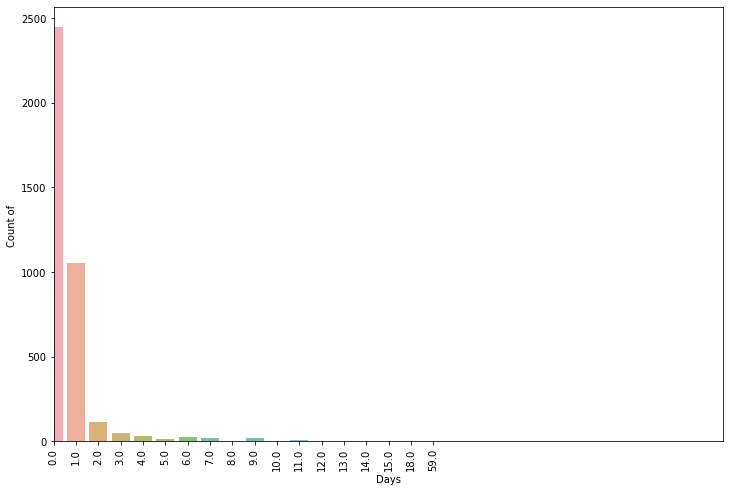

In [151]:
X = filtered_dates_j['Days'].value_counts()
plt.figure(figsize = (12,8))
sns.barplot(X.index, X.values, alpha = 0.75)
plt.xlim(0,30)
plt.ylabel('Count of ')
plt.xlabel('Days')
plt.xticks(rotation = 'vertical')
plt.show()

AttributeError: 'Float64Index' object has no attribute 'sum'